Se requiere de un modelo que proponga un valor de cantidad de unidades de compra para cada producto. Deberás tener en cuenta que es tan importante poder encontrar el modelo como también explicar como lograste obtenerlo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
from IPython.display import clear_output

In [9]:
df_compra = pd.read_csv("../Datasets/Compra.csv", sep=",", parse_dates=["Fecha"])

In [10]:
df_compra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   IdCompra       11539 non-null  int64         
 1   Fecha          11539 non-null  datetime64[ns]
 2   Fecha_Año      11539 non-null  int64         
 3   Fecha_Mes      11539 non-null  int64         
 4   Fecha_Periodo  11539 non-null  int64         
 5   IdProducto     11539 non-null  int64         
 6   Cantidad       11539 non-null  int64         
 7   Precio         11172 non-null  float64       
 8   IdProveedor    11539 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 811.5 KB


In [11]:
df_compra.shape

(11539, 9)

Nos quedamos con los campos que vamos a utilizar

In [12]:
df_compra = df_compra[['Fecha','IdProducto','Cantidad','Fecha_Año','Fecha_Mes','Fecha_Periodo']]

In [13]:
df_compra.sort_values(['IdProducto','Fecha'], inplace = True)

In [14]:
df_compra.reset_index(inplace = True, drop  = True)
df_compra.head()

Fecha  IdProducto  Cantidad  Fecha_Año  Fecha_Mes  Fecha_Periodo
0 2015-01-30       42737         2       2015          1         201501
1 2015-05-29       42737         8       2015          5         201505
2 2015-06-26       42737         9       2015          6         201506
3 2015-07-31       42737         5       2015          7         201507
4 2015-08-28       42737        10       2015          8         201508

Visualizamos el comportamiento de los datos de un único producto aleatorio

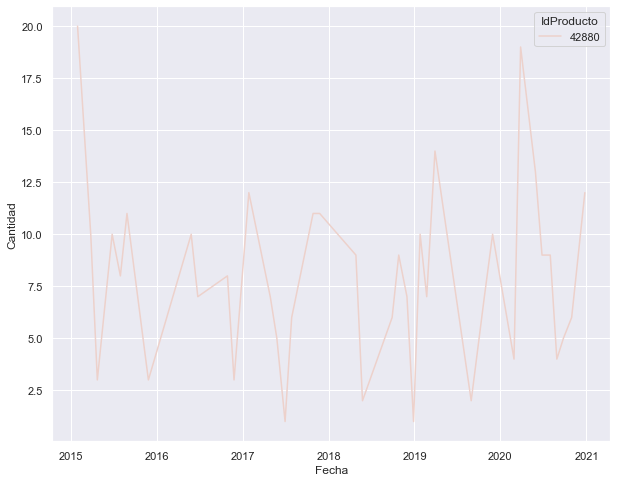

Convertimos el campos Fecha a un valor numérico para utilizarlo como input al modelo de regresión

Fecha  IdProducto  Cantidad  Fecha_Año  Fecha_Mes  Fecha_Periodo  \
0 2015-01-30       42737         2       2015          1         201501   
1 2015-05-29       42737         8       2015          5         201505   
2 2015-06-26       42737         9       2015          6         201506   
3 2015-07-31       42737         5       2015          7         201507   
4 2015-08-28       42737        10       2015          8         201508   

   Fecha_Numerico  
0          735628  
1          735747  
2          735775  
3          735810  
4          735838

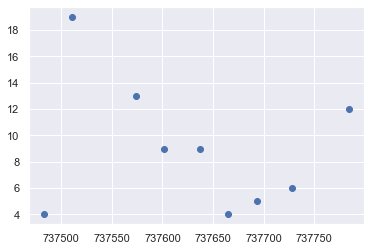

In [18]:
# Ploteamos


In [21]:
from sklearn.linear_model import LinearRegression

La separación entre los datos de entrenamiento y prueba, lo hacemos en base a períodos

Evaluamos el error

In [27]:
from sklearn.metrics import mean_squared_error


Error en datos de train: 19.895193920155403
Error en datos de test: 22.934573428341803


Graficamos

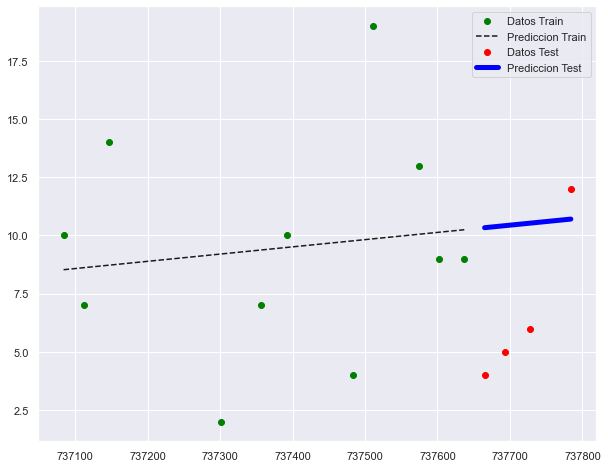

In [28]:
plt.figure(figsize = (10,8))

plt.scatter(X_train, y_train,  color='green', label = 'Datos Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediccion Train')

plt.scatter(X_test, y_test,  color='red', label = 'Datos Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediccion Test')

plt.legend()
plt.show()

Establecemos una fecha real para la cual queremos hacer la predicción y usamos el modelo

In [29]:
from datetime import datetime
fecha_prediccion = '2021-01-01'

In [30]:
fecha_prediccion = datetime.strptime(fecha_prediccion, '%Y-%m-%d').date()